# HPDP Assignment 2: Big Data Processing

This notebook demonstrates different strategies for handling large datasets using Python libraries.

In [1]:
import os

# Set the path to the dataset files
dataset_path = "Traffic and Weather Datasets/Traffic Datasets"
file_path4 = os.path.join(dataset_path, "traffic_speed_PeMSD4.csv")
file_path7 = os.path.join(dataset_path, "traffic_speed_PeMSD7.csv")

print("Path to dataset files:")
print(f"File 1: {file_path4}")
print(f"File 2: {file_path7}")

Path to dataset files:
File 1: Traffic and Weather Datasets/Traffic Datasets\traffic_speed_PeMSD4.csv
File 2: Traffic and Weather Datasets/Traffic Datasets\traffic_speed_PeMSD7.csv


### Performance Metrics

In [2]:
def track_performance(method_name, start_time, start_memory, df):
    """Track performance metrics for data cleaning operations."""
    end_time = time.time()
    end_memory = psutil.Process().memory_info().rss / (1024 * 1024)  # MB

    time_taken = end_time - start_time
    throughput = len(df) / time_taken if time_taken > 0 else 0
    memory_used = end_memory - start_memory  # in MB

    return {
        "Method": method_name,
        "Time (s)": time_taken,
        "Throughput (rows/s)": throughput,
        "Memory Used (MB)": memory_used
    }

### Data Preprocessing with Pandas

In [3]:
import pandas as pd
import os
import time
import psutil

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 * 1024)

# Load the dataset using pandas directly with the local file path
try:
    chunk_size = 10000  # Process data in chunks of 10,000 rows
    for df1 in pd.read_csv(file_path4, chunksize=chunk_size):
       print(track_performance("Pandas", start_time, start_memory, df1))

    # Display the first few rows of the dataset
    print("First 5 records:")
    print(df1.head())

    # Describe the dataset
    print("\n--- Dataset Description ---")
    print(f"Shape of the dataset: {df1.shape}")
    print("\nData Types of Columns:")
    print(df1.dtypes)

    pandas_result = track_performance("Pandas", start_time, start_memory, df1)
    print(pandas_result)

except FileNotFoundError:
    print(f"Error: File not found at {file_path4} or {file_path7}")
    print("Please check the contents of the directory:", os.listdir(dataset_path))
except Exception as e:
    print(f"An error occurred: {e}")

{'Method': 'Pandas', 'Time (s)': 0.010805130004882812, 'Throughput (rows/s)': 925486.3195057369, 'Memory Used (MB)': 9.7421875}
{'Method': 'Pandas', 'Time (s)': 0.02066969871520996, 'Throughput (rows/s)': 483799.98846530943, 'Memory Used (MB)': 15.140625}
{'Method': 'Pandas', 'Time (s)': 0.03088831901550293, 'Throughput (rows/s)': 323746.9800470843, 'Memory Used (MB)': 11.94921875}
{'Method': 'Pandas', 'Time (s)': 0.040723562240600586, 'Throughput (rows/s)': 245558.08602691928, 'Memory Used (MB)': 12.96484375}
{'Method': 'Pandas', 'Time (s)': 0.050740718841552734, 'Throughput (rows/s)': 197080.37702869065, 'Memory Used (MB)': 12.66796875}
First 5 records:
                 timestamp  detector_id  speed_mph  volume  occupancy  \
40000  2023-05-19 21:20:00           75  49.433861      64   0.468589   
40001  2023-05-19 21:25:00           86  54.054532      39   0.659053   
40002  2023-05-19 21:30:00           73  35.139769      50   0.316528   
40003  2023-05-19 21:35:00           29  39.

### Data Preprocessing with Dask

In [4]:
import dask.dataframe as dd
import pandas as pd
import os
import time
import psutil

try:
    start_time = time.time()
    start_memory = psutil.Process().memory_info().rss / (1024 * 1024)

    # Read the CSV files into Dask DataFrames
    ddf4 = dd.read_csv(file_path4)
    ddf5 = dd.read_csv(file_path7)

    print("\nDask DataFrame for traffic_speed_PeMSD4:")
    print(ddf4.info())
    print(ddf4.head())

    print("\nDask DataFrame for traffic_speed_PeMSD7:")
    print(ddf5.info())
    print(ddf5.head())

    dask_result = track_performance("Dask", start_time, start_memory, ddf4)
    print(dask_result)

except FileNotFoundError as e:
    print(f"Error: One or more files not found: {e}")
    print(f"Please ensure the following paths are correct:")
    print(f"- {file_path4}")
    print(f"- {file_path7}")
except Exception as e:
    print(f"An error occurred: {e}")


Dask DataFrame for traffic_speed_PeMSD4:
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 6 entries, timestamp to lane_number
dtypes: float64(2), int64(3), string(1)None
             timestamp  detector_id  speed_mph  volume  occupancy  lane_number
0  2023-01-01 00:00:00           52  39.571379      54   0.257098            4
1  2023-01-01 00:05:00           93  46.529010      37   0.171498            1
2  2023-01-01 00:10:00           15  47.579711      58   0.850433            4
3  2023-01-01 00:15:00           72  48.370518      55   0.591607            2
4  2023-01-01 00:20:00           61  55.859297      49   0.249393            2

Dask DataFrame for traffic_speed_PeMSD7:
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 6 entries, timestamp to lane_number
dtypes: float64(2), int64(3), string(1)None
             timestamp  detector_id  speed_mph  volume  occupancy  lane_number
0  2023-01-01 00:00:00           52  52.760889      52   0.541387            2
1  2023-01-01 00

### Data Preprocessing with Polars

In [5]:
import polars as pl
import pandas as pd
import os
import time
import psutil

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 * 1024)

try:
    # Read the CSV files into Polars DataFrames
    lf4 = pl.scan_csv(file_path4)
    lf5 = pl.scan_csv(file_path7)

    print("\nInspecting traffic_speed_PeMSD4.csv using Polars:")
    # Get the first 5 rows
    head4 = lf4.limit(5).collect()
    print("\nFirst 5 rows:")
    print(head4)

    print("\nPolars LazyFrame for traffic_speed_PeMSD4:")
    print(lf4)

    print("\nPolars LazyFrame for traffic_speed_PeMSD7:")
    print(lf5)

    # Collect the LazyFrame to get a Polars DataFrame before getting its length
    df4_collected = lf4.collect()
    polar_result = track_performance("Polars", start_time, start_memory, df4_collected)
    print(polar_result)

except FileNotFoundError as e:
    print(f"Error: One or more files not found: {e}")
    print(f"Please ensure the following paths are correct:")
    print(f"- {file_path4}")
    print(f"- {file_path7}")
except Exception as e:
    print(f"An error occurred: {e}")


Inspecting traffic_speed_PeMSD4.csv using Polars:

First 5 rows:
shape: (5, 6)
┌─────────────────────┬─────────────┬───────────┬────────┬───────────┬─────────────┐
│ timestamp           ┆ detector_id ┆ speed_mph ┆ volume ┆ occupancy ┆ lane_number │
│ ---                 ┆ ---         ┆ ---       ┆ ---    ┆ ---       ┆ ---         │
│ str                 ┆ i64         ┆ f64       ┆ i64    ┆ f64       ┆ i64         │
╞═════════════════════╪═════════════╪═══════════╪════════╪═══════════╪═════════════╡
│ 2023-01-01 00:00:00 ┆ 52          ┆ 39.571379 ┆ 54     ┆ 0.257098  ┆ 4           │
│ 2023-01-01 00:05:00 ┆ 93          ┆ 46.52901  ┆ 37     ┆ 0.171498  ┆ 1           │
│ 2023-01-01 00:10:00 ┆ 15          ┆ 47.579711 ┆ 58     ┆ 0.850433  ┆ 4           │
│ 2023-01-01 00:15:00 ┆ 72          ┆ 48.370518 ┆ 55     ┆ 0.591607  ┆ 2           │
│ 2023-01-01 00:20:00 ┆ 61          ┆ 55.859297 ┆ 49     ┆ 0.249393  ┆ 2           │
└─────────────────────┴─────────────┴───────────┴────────┴───────────┴

### Performance Comparison Plot

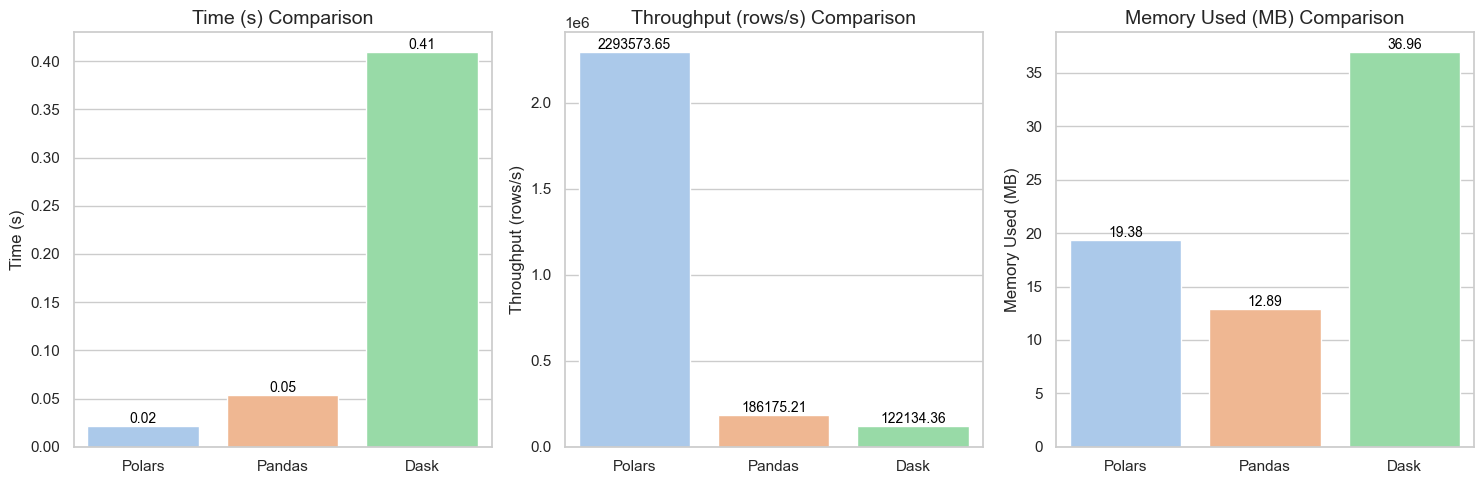

In [9]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results):
    """Plot performance comparison results in 3 columns"""
     # Convert results to pandas DataFrame for plotting
    results_df = pl.DataFrame(results).to_pandas()

    # Set plot style
    sns.set(style="whitegrid")

    # Define metrics and color palette
    metrics = ["Time (s)", "Throughput (rows/s)", "Memory Used (MB)"]
    palette = sns.color_palette("pastel", n_colors=len(results_df['Method'].unique()))

    # Create a single row of 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.barplot(
            x="Method", y=metric, hue="Method", legend=False,
            data=results_df, palette=palette, ax=ax
        )

        # Add values on top of the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_title(f"{metric} Comparison", fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(metric)

    plt.tight_layout()
    plt.show()


# Collect all results - now including Dask performance
results = [polar_result, pandas_result, dask_result]

# Plot results
plot_results(results)